# Introduction
Managing a portfolio or Portfolio Management of multiples strategies do not differ much from how to manage a portfolio of assets, only that in this case, the assets are the strategies we have operational.

Of course, these strategies handle instruments in which we can be long, short or stay waiting. Obviously, the objective of managing a portfolio of strategies is still to maximize return while minimizing risk.


# Portfolio's Elements
Let's define the portfolio's elements which we have some control over them:

* Capital: The amount of money we have available to invest or speculate.
* Instruments: These are the assets available for inclusion in our portfolio management strategy.
* Currency: The currency in which the asset is traded. When we invest in an asset denominated in a foreign currency, we assume the foreign exchange risk.
* Volatility: Also called asset risk, indicates the movement of the asset for the period analysed.
* Cost: Amount of money needed to buy/sell-short an asset.
* Liquidity: It is the capacity of the asset to absorb our operations.
* Rules: These are the strategies that try to take advantage of some market regime.
* Position weight: The amount of capital we allocate to each asset and/or strategy.
* Return: Absolute returns are the return of our portfolio and relative returns are the return of our portfolio compared to a benchmark. When we are not comparing our returns with anybody, absolute return is a good measure, but when we need to compare performances we use the relative return.
* Risk or Volatility: This is the (estimated) amount that the portfolio assumes.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [75]:
# get adjusted closing prices of  selected companies
ticker = ["MSFT", "AMZN", "KO", "MA", "COST", 
           "LUV", "XOM", "PFE", "JPM", "UNH", 
           "ACN", "DIS", "GILD", "F", "TSLA"] 
 

data = pd.DataFrame()
for tickers in ticker:
  data[tickers] = yf.download(tickers, data_source='yahoo', start='2010-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [76]:
data.head(5)

,MSFT,AMZN,KO,MA,COST,LUV,XOM,PFE,JPM,UNH,ACN,DIS,GILD,F,TSLA
Date,,,,,,,,,,,,,,,
2009-12-31,23.493395,134.520004,19.483227,24.065151,43.977592,10.604203,42.586098,10.716870,30.619154,25.254896,32.882641,28.090710,17.246176,6.968013,NaN
2010-01-04,23.855658,133.899994,19.496914,24.146002,44.155968,10.372269,43.185635,11.152852,31.524038,26.124914,33.334297,27.933922,17.258133,7.163116,NaN
2010-01-05,23.863367,134.690002,19.261057,24.074553,44.022186,10.919640,43.354256,10.993775,32.134663,26.083477,33.540306,27.864239,17.242193,7.636940,NaN
2010-01-06,23.716913,132.250000,19.254227,24.039745,44.594494,10.594928,43.728966,10.958426,32.311214,26.340338,33.896870,27.716162,17.840048,7.922629,NaN
2010-01-07,23.470270,130.000000,19.206366,23.882650,44.378941,10.752646,43.591564,10.917185,32.951271,27.351198,33.865173,27.724876,17.883890,8.124702,NaN


In [77]:
data.to_csv('stock_data.csv', index=True)


In [78]:
# Basic Statistics
data.describe()

,MSFT,AMZN,KO,MA,COST,LUV,XOM,PFE,JPM,UNH,ACN,DIS,GILD,F,TSLA
count,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,3077.000000,2954.000000
mean,85.489111,1101.982064,35.957100,140.159527,170.987473,33.830576,57.897801,25.122035,70.431442,157.024724,122.137076,90.440187,53.098715,10.126401,138.173302
std,82.015317,1066.101287,10.255238,112.974642,120.049529,18.383996,9.834421,9.967253,39.286707,121.584080,83.556302,43.151736,22.546844,2.595934,249.181125
min,17.898994,108.610001,17.258009,18.083038,40.104916,6.838267,27.525696,8.507235,21.411943,23.193907,29.126770,25.536150,12.686523,3.969501,3.160000
25%,25.356926,259.079987,28.583067,49.036747,83.758064,12.229243,53.581738,17.953730,36.407749,49.183170,60.070305,48.718288,31.200159,8.562318,19.573000
50%,47.399197,625.309998,34.814587,92.173737,133.802124,37.706306,60.299580,24.973995,55.078758,110.689751,96.883133,95.094826,59.835670,9.840118,46.527000
75%,109.969009,1775.069946,42.545250,221.038895,224.737839,50.844719,64.533615,32.170147,97.915390,238.788651,159.747711,111.519997,67.287727,11.388543,68.001501
max,342.402008,3731.409912,62.372547,396.750000,566.910767,64.447037,87.779999,60.787823,170.756454,507.660004,414.345795,201.910004,97.771690,25.061152,1229.910034


In [66]:
data.kurtosis()

MSFT    1.137068
AMZN   -0.241645
KO     -0.553064
MA     -0.734768
COST    1.041966
LUV    -1.490799
XOM     0.310525
PFE     0.240979
JPM    -0.380511
UNH    -0.072957
ACN     0.948448
DIS    -0.576666
GILD   -0.862320
F       5.272623
TSLA    4.665415
dtype: float64

In [67]:
data.skew()

MSFT    1.470422
AMZN    1.038306
KO      0.353283
MA      0.822957
COST    1.288282
LUV    -0.162352
XOM    -0.844913
PFE     0.507600
JPM     0.794813
UNH     0.912112
ACN     1.241483
DIS     0.309337
GILD   -0.543722
F       1.560930
TSLA    2.404292
dtype: float64

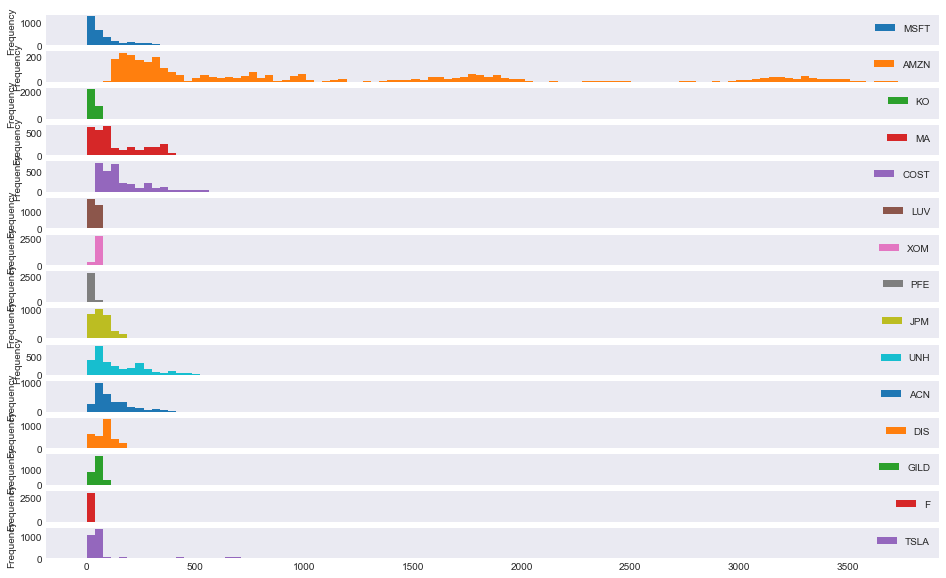

In [70]:
data.plot(kind="hist", bins=100, subplots=True, figsize=(16,10));

<AxesSubplot:title={'center':'Portfolio Management'}, xlabel='Date'>

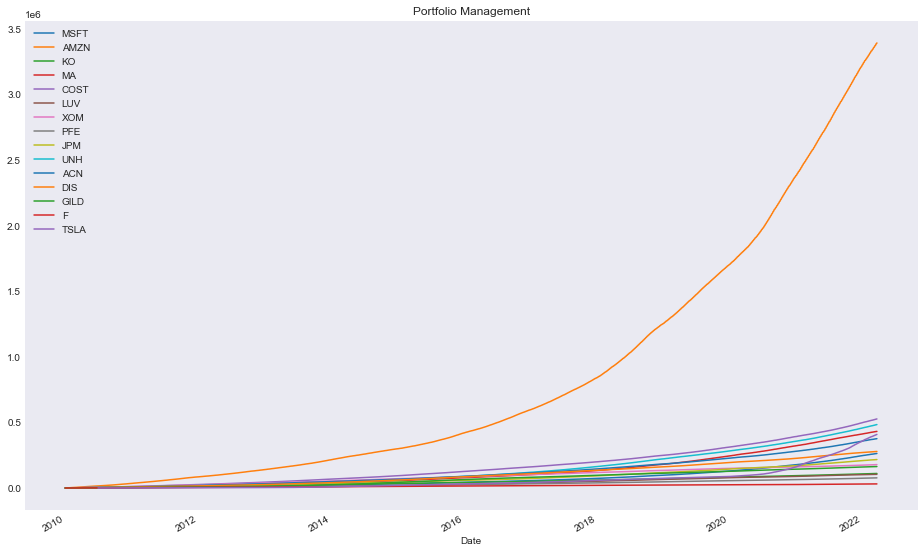

In [72]:
data.cumsum().plot(title='Portfolio Management', figsize=(16,10))

In [50]:
# calculate daily and annual returns of the stocks
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [55]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(ticker)
num_portfolios = 10000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    # a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(ticker):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

In [57]:
df.head(5)

,Returns,Volatility,Sharpe Ratio,MSFT Weight,AMZN Weight,KO Weight,MA Weight,COST Weight,LUV Weight,XOM Weight,PFE Weight,JPM Weight,UNH Weight,ACN Weight,DIS Weight,GILD Weight,F Weight,TSLA Weight
0,0.239677,0.194989,1.229182,0.066567,0.073562,0.003670,0.022110,0.088336,0.107494,0.039570,0.115191,0.093011,0.024484,0.071443,0.045392,0.023447,0.101268,0.124456
1,0.208902,0.187966,1.111379,0.033813,0.012160,0.087830,0.106086,0.040199,0.099728,0.075362,0.007056,0.020063,0.027208,0.144697,0.075769,0.084227,0.106933,0.078868
2,0.198422,0.172276,1.151767,0.102771,0.090927,0.045355,0.040204,0.107241,0.038674,0.097362,0.093443,0.060567,0.103819,0.010933,0.011575,0.078951,0.100219,0.017958
3,0.221665,0.184420,1.201959,0.051646,0.126034,0.030793,0.131447,0.091390,0.127568,0.097745,0.008133,0.041969,0.107801,0.022571,0.093729,0.025865,0.009897,0.033412
4,0.228006,0.179981,1.266835,0.053999,0.107125,0.115874,0.058369,0.056288,0.077792,0.039624,0.014352,0.006238,0.077837,0.099151,0.081817,0.079560,0.051826,0.080149


In [60]:
# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in ticker]
# reorder dataframe columns
df = df[column_order]

Text(0.5, 1.0, 'Efficient Frontier')

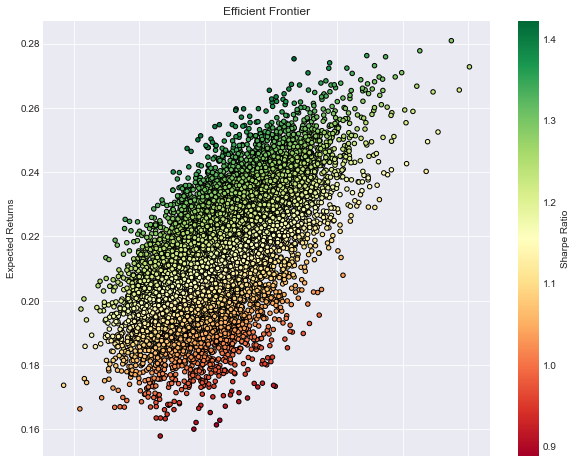

In [61]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

In [62]:
# Sow the expected annual return, volatility (risk), and variance

print('Expected annual return: ',returns)
print('Annual volatility/ risk: ',volatility)
print('Expected Sharpe Ratio: ',sharpe)

Expected annual return:  0.22888003735710777
Annual volatility/ risk:  0.1841017766568956
Expected Sharpe Ratio:  1.2432255761641233


In [63]:
# find min Volatility & max sharpe values in the dataframe (data)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

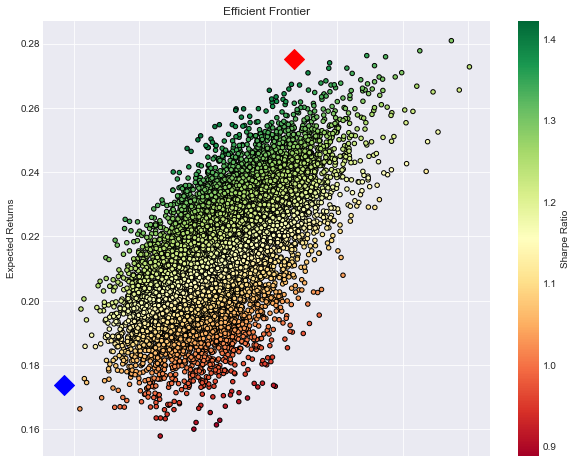

In [64]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()